<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/14324_Fundus_cat_dr_glau_normal_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

In [ ]:
os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split')


['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/train')


['cataract', 'diabetic_retinopathy', 'normal', 'glaucoma']

In [ ]:
os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/val')


['cataract', 'diabetic_retinopathy', 'normal', 'glaucoma']

In [ ]:
os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/val')


['cataract', 'diabetic_retinopathy', 'normal', 'glaucoma']

In [ ]:
testcat = os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/test/cataract')
print(len(testcat))


105


In [ ]:
testDR = os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/test/diabetic_retinopathy')
print(len(testDR))


111


In [ ]:
testnormal = os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/test/normal')
print(len(testnormal))


108


In [ ]:
testglaucoma = os.listdir('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/test/glaucoma')
print(len(testglaucoma))


102


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/train',
                                          target_size=(224,224))

validationimages = datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/val',
                                               target_size=(224,224))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/split/test',
                                          target_size=(224,224))

Found 2945 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
Found 426 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Conv2D(128,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(4, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)       

In [ ]:
model.fit(trainimages,
          batch_size=32,
          epochs=5,
          validation_data=validationimages)
model.save('funduscatdrglaunor_model.keras')


Epoch 1/10
93/93 [==============================] - 1738s 19s/step - loss: 0.9384 - accuracy: 0.5715 - val_loss: 0.7532 - val_accuracy: 0.6492
Epoch 2/10
93/93 [==============================] - 186s 2s/step - loss: 0.7062 - accuracy: 0.7046 - val_loss: 0.6588 - val_accuracy: 0.7134
Epoch 3/10
93/93 [==============================] - 191s 2s/step - loss: 0.5711 - accuracy: 0.7626 - val_loss: 0.5403 - val_accuracy: 0.7872
Epoch 4/10
93/93 [==============================] - 193s 2s/step - loss: 0.5090 - accuracy: 0.7939 - val_loss: 0.5126 - val_accuracy: 0.7907
Epoch 5/10
93/93 [==============================] - 190s 2s/step - loss: 0.4612 - accuracy: 0.8109 - val_loss: 0.4878 - val_accuracy: 0.7919
Epoch 6/10
93/93 [==============================] - 183s 2s/step - loss: 0.4107 - accuracy: 0.8302 - val_loss: 0.4598 - val_accuracy: 0.8169
Epoch 7/10
93/93 [==============================] - 195s 2s/step - loss: 0.3946 - accuracy: 0.8360 - val_loss: 0.4491 - val_accuracy: 0.8157
Epoch 8/10


In [ ]:
y_pred = model.predict(testimages)
y_pred

14/14 [==============================] - 11s 775ms/step


array([[8.1694261e-06, 9.9572980e-01, 1.7094548e-04, 4.0910076e-03],
       [5.7421887e-01, 6.6429049e-05, 2.7692813e-02, 3.9802197e-01],
       [6.6291231e-01, 3.9673056e-03, 1.1858244e-01, 2.1453787e-01],
       ...,
       [8.5578132e-01, 3.2763190e-05, 1.3358346e-01, 1.0602314e-02],
       [2.4300062e-11, 1.0000000e+00, 4.9573096e-10, 1.8550878e-10],
       [7.6130909e-01, 9.0475957e-04, 5.9254531e-02, 1.7853168e-01]],
      dtype=float32)

In [ ]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([1, 0, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 3, 3, 0, 0, 3, 3, 3, 2, 1, 3,
       1, 2, 3, 3, 1, 1, 0, 0, 3, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 3, 3,
       0, 2, 3, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 0, 1, 3, 0, 2, 0, 3, 3, 2,
       0, 3, 2, 3, 1, 3, 1, 0, 0, 2, 3, 1, 0, 2, 3, 1, 0, 0, 1, 0, 0, 2,
       3, 0, 0, 2, 1, 2, 2, 0, 3, 3, 3, 2, 3, 3, 0, 1, 1, 0, 0, 3, 1, 3,
       2, 0, 3, 0, 2, 1, 2, 1, 3, 3, 3, 1, 0, 3, 1, 1, 1, 1, 0, 3, 0, 2,
       2, 1, 0, 0, 3, 3, 1, 3, 1, 0, 1, 0, 2, 3, 3, 2, 0, 0, 3, 2, 2, 2,
       3, 3, 1, 3, 3, 0, 0, 1, 1, 3, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 3, 1, 3, 1, 0, 1, 0, 0, 3, 1, 2, 1, 0, 3, 2, 3, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 3, 3, 3, 2, 0, 0, 1, 0, 3, 2, 3, 0, 1, 1, 0, 1,
       3, 3, 3, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 3, 2, 3, 0, 2, 3, 1, 3,
       0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 3, 3, 2, 1, 3, 0, 3, 1, 0, 1, 0, 1,
       1, 3, 0, 0, 1, 2, 1, 3, 2, 3, 0, 1, 0, 1, 1, 2, 2, 3, 3, 0, 1, 1,
       0, 3, 1, 3, 0, 0, 0, 2, 2, 0, 2, 1, 3, 2, 0,

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[33, 24, 16, 32],
       [30, 33, 19, 29],
       [34, 30, 15, 23],
       [30, 24, 23, 31]])

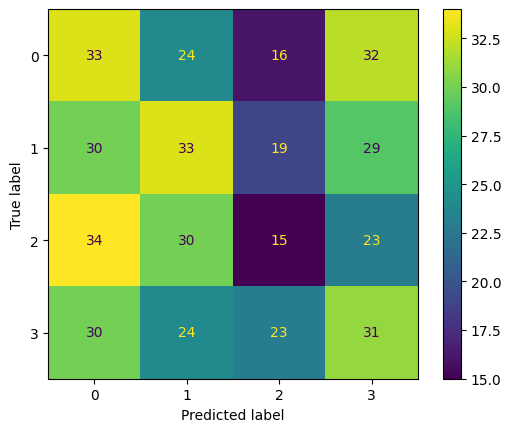

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

In [ ]:
testimages.class_indices

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [ ]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       0.26      0.31      0.28       105
           1       0.30      0.30      0.30       111
           2       0.21      0.15      0.17       102
           3       0.27      0.29      0.28       108

    accuracy                           0.26       426
   macro avg       0.26      0.26      0.26       426
weighted avg       0.26      0.26      0.26       426



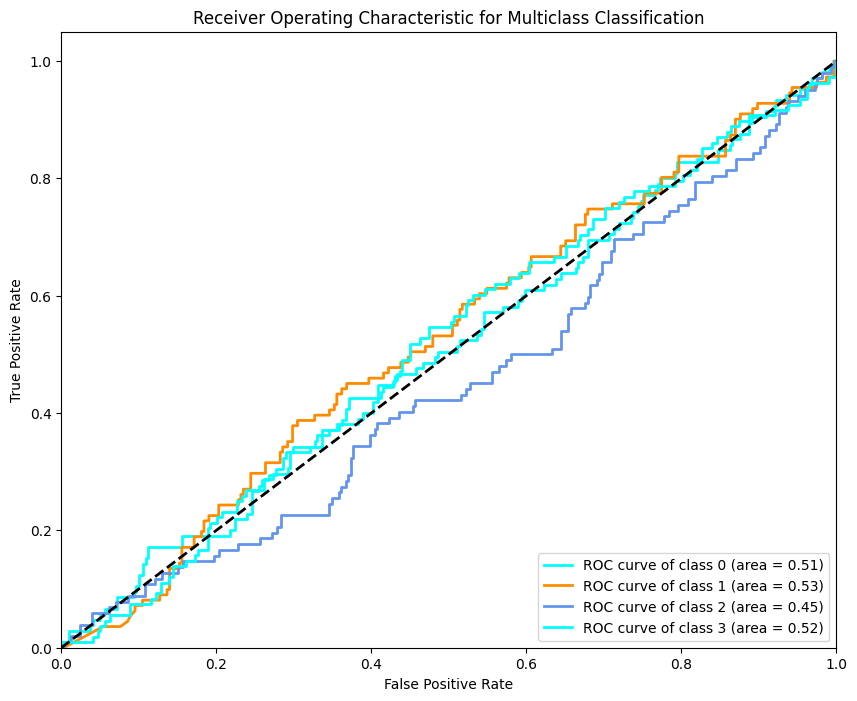

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 108ms/step
Prediction: glaucoma


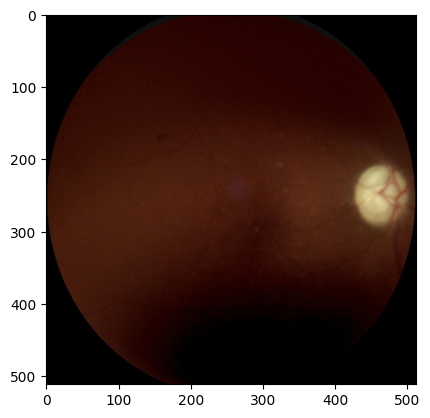

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

# Load the trained CNN model
model = load_model('/content/funduscatdrglaunor_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224,224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["cataract", "diabetic retinopathy", "glaucoma", "normal"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/fundus images cataract DR glaucoma normal/glaucoma/1211_right.jpg"
 # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/fundus images cataract DR glaucoma normal/glaucoma/1211_right.jpg')
plt.imshow(testimage)


In [ ]:
testimages.class_indices

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}